# Allantools demo

Allantools tests with various noise types. We test ADEV etc. by calculations on synthetic data with known slopes of ADEV.

#### Import packages and setup notebook

In [1]:
%matplotlib inline

In [2]:
import numpy
import matplotlib.pyplot as plt 
import allantools
from allantools import noise

In [3]:
def plotallan(plt, y, rate, taus, style):
    (t2, ad, ade, adn) = allantools.oadev(y, rate, taus)
    plt.loglog(t2, ad, style)


def plotallan_phase(plt, y, rate, taus, style):
    (t2, ad, ade, adn) = allantools.oadev_phase(y, rate, taus)
    plt.loglog(t2, ad, style)


def plotline(plt, alpha, taus, style):
    """ plot a line with the slope alpha """
    y = [pow(tt, alpha) for tt in taus]
    plt.loglog(taus, y, style)

Colors: http://en.wikipedia.org/wiki/Colors_of_noise

* Pink frequency noise - should have constant ADEV
* White phase noise - should have 1/tau ADEV
* White frequency noise - should have 1/sqrt(tau) ADEV
* Random Walk frequency noise - should have sqrt(tau) ADEV

Done.


c:\users\naudotojas\appdata\local\programs\python\python35\lib\site-packages\allantools\allantools.py:326: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  d2 = data[2 * mj::stride]
c:\users\naudotojas\appdata\local\programs\python\python35\lib\site-packages\allantools\allantools.py:327: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  d1 = data[1 * mj::stride]


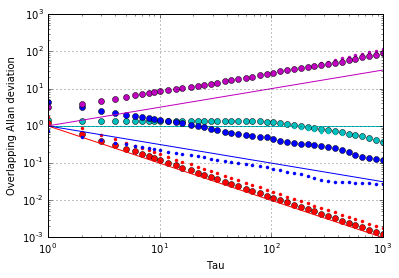

In [5]:
t = numpy.logspace(0, 3, 50)  # tau values from 1 to 1000
plt.subplot(111, xscale="log", yscale="log")
N = 10000

# pink frequency noise => constant ADEV
freq_pink = noise.pink(N)
phase_p = numpy.cumsum(noise.pink(N))  # integrate to get phase, color??
plotallan_phase(plt, phase_p, 1, t, 'co')
plotallan(plt, freq_pink, 1, t, 'c.')
plotline(plt, 0, t, 'c')

# white phase noise => 1/tau ADEV
phase_white = noise.white(N)
plotallan_phase(plt, phase_white, 1, t, 'ro')
freq_w = noise.violet(N)  # diff to get frequency, "Violet noise"
plotallan(plt, freq_w, 1, t, 'r.')
plotline(plt, -1, t, 'r')

# white frequency modulation => 1/sqrt(tau) ADEV
freq_white = noise.white(N)
phase_rw = noise.brown(N)  # integrate to get Brownian, or random walk phase
plotallan(plt, freq_white, 1, t, 'b.')
plotallan_phase(plt, phase_rw, 1, t, 'bo')
plotline(plt, -0.5, t, 'b')


# Brownian a.k.a random walk  frequency => sqrt(tau) ADEV
freq_rw = noise.brown(N)
phase_rw_rw = numpy.cumsum(noise.brown(N))  # integrate to get  phase
plotallan(plt, freq_rw, 1, t, 'm.')
plotallan_phase(plt, phase_rw_rw, 1, t, 'mo')
plotline(plt, +0.5, t, 'm')

plt.xlabel('Tau')
plt.ylabel('Overlapping Allan deviation')
print("Done.")
plt.grid()
plt.show()